In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [39]:
# Step 1: Extract the ZIP file
zip_file_path = "FIFA WC data.zip"
extraction_path ="files_fifa"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [41]:

# Step 2: Load the datasets
# Assuming the extracted files are in CSV format
# Adjust the file names based on the actual contents of the ZIP file
world_cups_file = os.path.join(extraction_path, 'WorldCups.csv')
world_cup_matches_file = os.path.join(extraction_path, 'WorldCupMatches.csv')
world_cup_players_file = os.path.join(extraction_path, 'WorldCupPlayers.csv')


world_cups = pd.read_csv(world_cups_file)
world_cup_matches = pd.read_csv(world_cup_matches_file)
world_cup_players = pd.read_csv(world_cup_players_file)

# Display the first few rows of the datasets
print("World Cups Data:")
print(world_cups.head())
print("\nWorld Cup Matches Data:")
print(world_cup_matches.head())
print("\nWorld Cup Players Data:")
print(world_cup_players.head())

World Cups Data:
   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607  

World Cup Matches Data:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1

In [48]:

world_cups = world_cups['Winner'].value_counts()
print(world_cups)

Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: count, dtype: int64


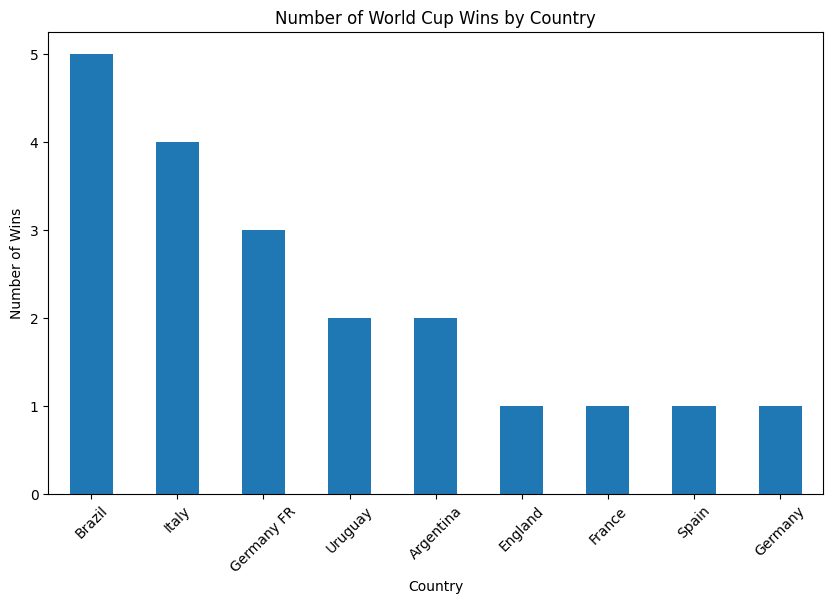

In [49]:
plt.figure(figsize=(10,6))
world_cups.plot(kind='bar')
plt.title('Number of World Cup Wins by Country')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

In [50]:
world_cup_matches['Total Goals'] = world_cup_matches['Home Team Goals'] + world_cup_matches['Away Team Goals']
goals_by_country = world_cup_matches.groupby('Home Team Name')['Total Goals'].sum().reset_index()


In [52]:
goals_by_country = goals_by_country.sort_values(by='Total Goals', ascending=False)
print(goals_by_country)

               Home Team Name  Total Goals
7                      Brazil        258.0
2                   Argentina        155.0
35                      Italy        140.0
26                 Germany FR        135.0
25                    Germany        101.0
..                        ...          ...
46                     Norway          1.0
75  rn">Serbia and Montenegro          1.0
68                    Ukraine          1.0
32                    IR Iran          0.0
76    rn">Trinidad and Tobago          0.0

[78 rows x 2 columns]


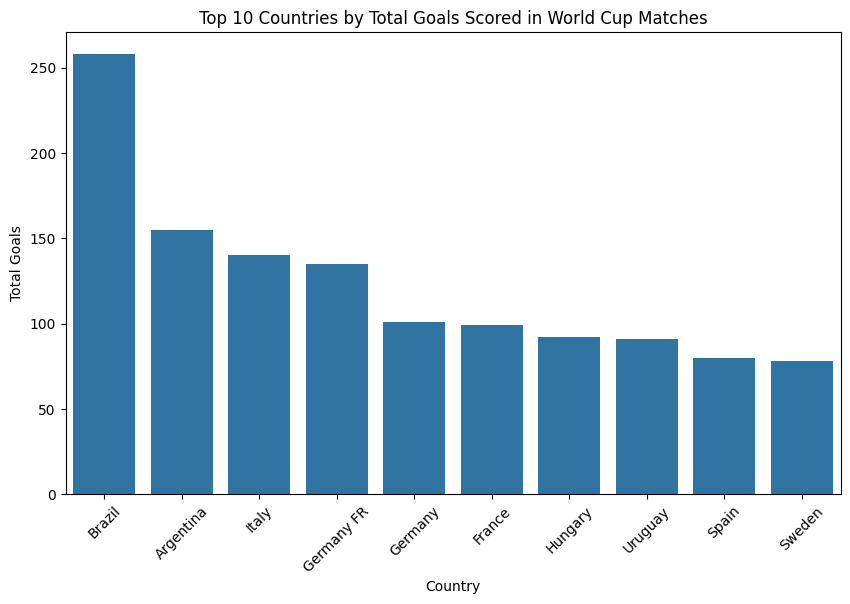

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x='Home Team Name', y='Total Goals', data=goals_by_country.head(10))
plt.title('Top 10 Countries by Total Goals Scored in World Cup Matches')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()

In [55]:
home_goals = world_cup_matches['Home Team Goals'].sum()
away_goals = world_cup_matches['Away Team Goals'].sum()
print(f"Total home goals scored: {home_goals}")
print(f"Total away goals scored: {away_goals}")

Total home goals scored: 1543.0
Total away goals scored: 871.0


In [63]:
correlation = world_cup_matches[['Home Team Goals', 'Away Team Goals']].corr()
print(correlation)

                 Home Team Goals  Away Team Goals
Home Team Goals         1.000000         0.012474
Away Team Goals         0.012474         1.000000


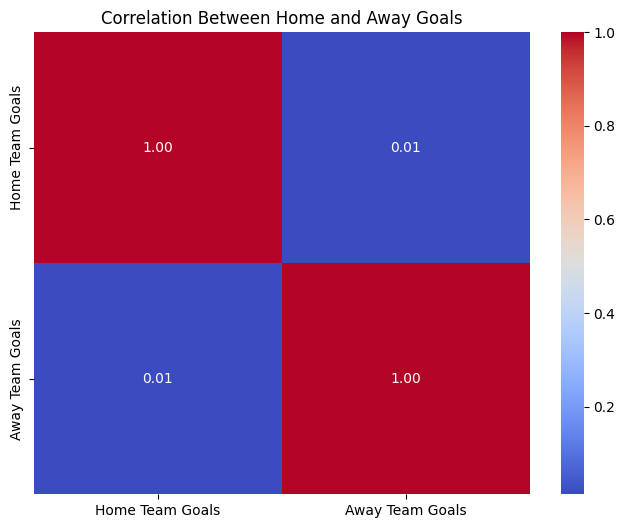

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Home and Away Goals')
plt.show()